In [931]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [932]:
df=pd.read_csv('avacado.csv', sep=',')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking the details of null values.

In [933]:
df.isna().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

As we see, every column is having the same number of na values, that is because, we see in the csv file thata after a particular number, every data is left blank, so it will be best if we remove the na values for all the data and then we can go ahead with a cleaner dataset.

In [934]:
df=df.dropna()

In [935]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


Dropped the na values in the dataset.

Now we have 1517 Rows and 14 columns

Average price is the output variable here to predict and we can compare the prices.

There is no relevance for the unnamed column and hence removing the column.

In [936]:
df=df.drop(columns='Unnamed: 0')

In [937]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


Looking at the type of data

In [938]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

Looking at the datatype, we see here that Date is not in date format, it is object so working on to get the dates segregated.

converting the object into datetime format so that the split is easy for us.

In [939]:
df['Date']=pd.to_datetime(df.Date)

In [940]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

Converted to date time format.

Now splitting of data for cleaning.

In [941]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day


In [942]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany,2015,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany,2015,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte,2016,10,16
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte,2016,9,10
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte,2016,2,10
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte,2016,9,25


Let us get the number of unique values in categorical part of the data and then encode them to do a better visualisatoin.

In [943]:
print(df.nunique())
print(df.dtypes)

Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
Year               2
Month             12
Day               31
dtype: int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
Year                     int64
Month                    int64
Day                      int64
dtype: object


Let us remove the date column as we alaready gave the daata segregated to three other columns.

In [944]:
df=df.drop(columns=['Date','year'])

In [945]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,Albany,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,Charlotte,2016,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,Charlotte,2016,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,Charlotte,2016,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,Charlotte,2016,9,25


We will drop the type column as well as it is only having one type of data that is conventional and will not contribute for machinr to learn from the data.

In [946]:
df=df.drop(columns='type')

In [947]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,Albany,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,Charlotte,2016,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,Charlotte,2016,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,Charlotte,2016,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,Charlotte,2016,9,25


Now we are left with 13 columns in the data.

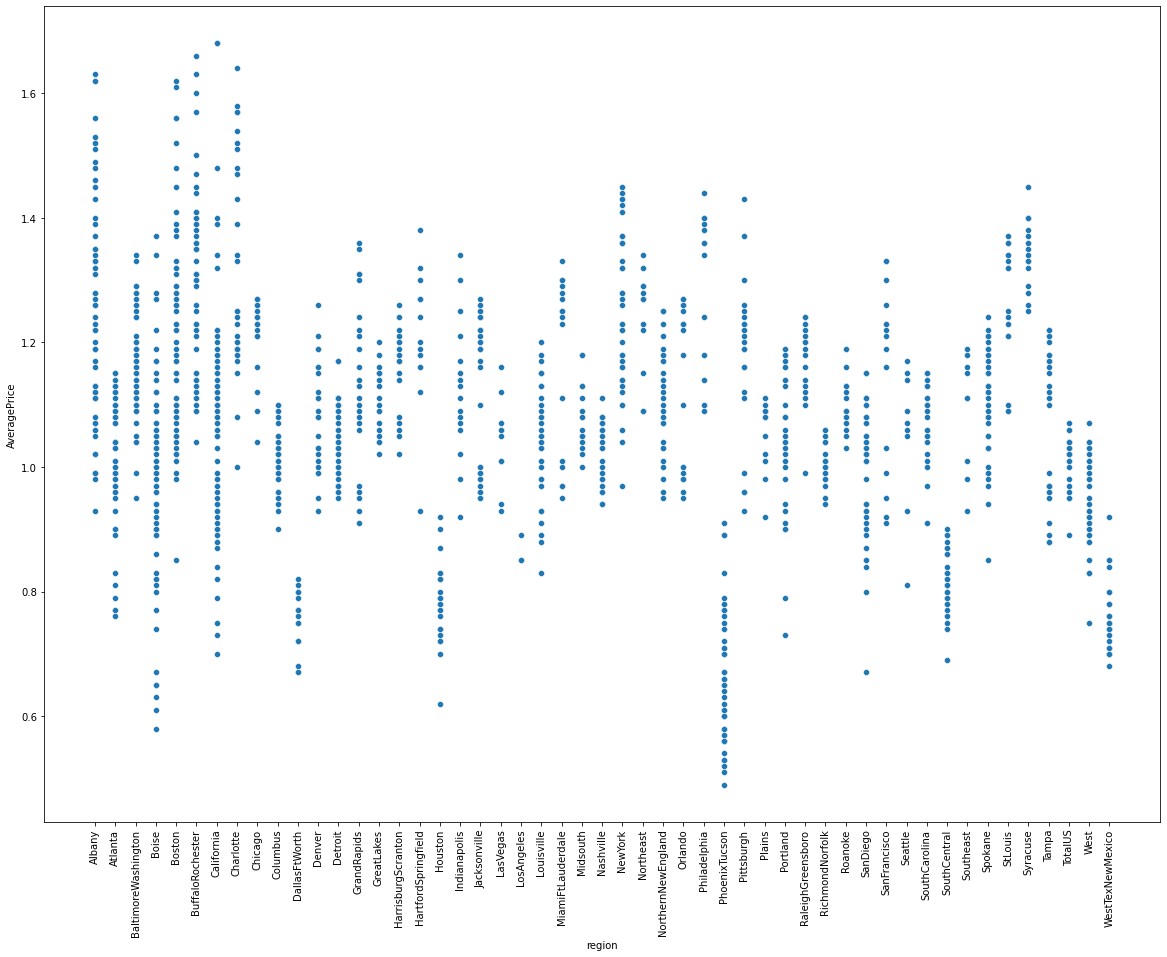

In [948]:
plt.figure(figsize=(20,15))
sns.scatterplot(x=df["region"],y=df["AveragePrice"])
plt.xticks(rotation=90)
plt.show()


In Albany, Atlanta, Bwashington, Boise etc., the prices are comparitively higher.

There is only one data that can be considered for categorical data, that is the region part, hence label encoding them.

In [949]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['region']=enc.fit_transform(df['region'])


In [950]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,7,2016,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,7,2016,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,7,2016,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,7,2016,9,25


The region part is now encoded. 

In [951]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
region            int32
Year              int64
Month             int64
Day               int64
dtype: object

Now we have every data as numerical data.

As we see here that almost all the dataa are tidy enough, we caan move ahead with some part of visualisation.

## Describe

In [952]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,21.196440,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,16.132398,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,6.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,19.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,35.000000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,50.000000,2016.000000,12.000000,31.000000


As we see a huge range of data, will have to work on to get all the data to scale before modelling.


. The average mean is around 1.07

. To get further clarification, we have to get correlation of the plots.

## Correlation

<AxesSubplot:>

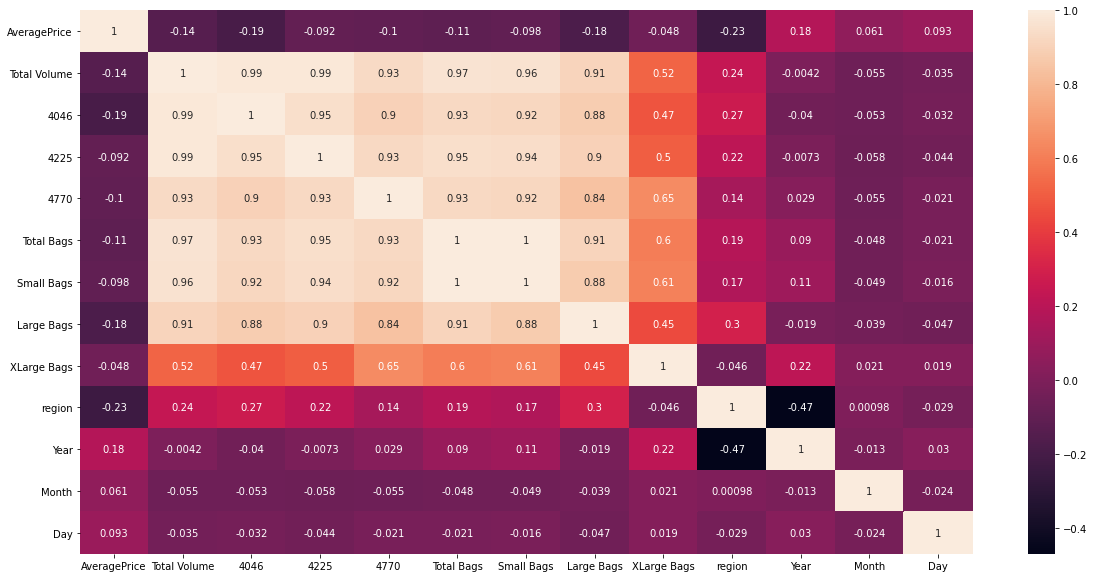

In [953]:
plt.figure(figsize=(20,10))
corr=df.corr()
sns.heatmap(corr, annot=True)

The types of bags and the total volume are highly correlated to each other as expected.

Overlooking the Date part for now, we will check the datewise distribution in the later part.

Looking at the correlation to the average price for each data, we see here that there is neither  high positive or high negative correlation in the data, all the data are almost balanced.

## Visualisation

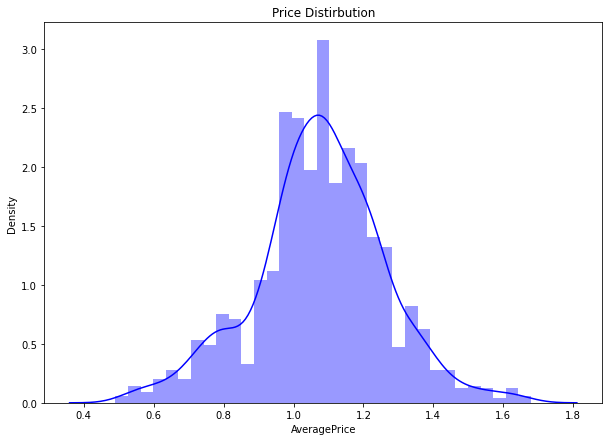

In [954]:
plt.figure(figsize=(10,7))
plt.title("Price Distirbution")
ax = sns.distplot(df["AveragePrice"], color = 'b')

So the average price of avacado stands between 1.0 and 1.2 approximating around 1.15. we will get further calrification in describe.

Text(0.5, 1.0, 'Average Price')

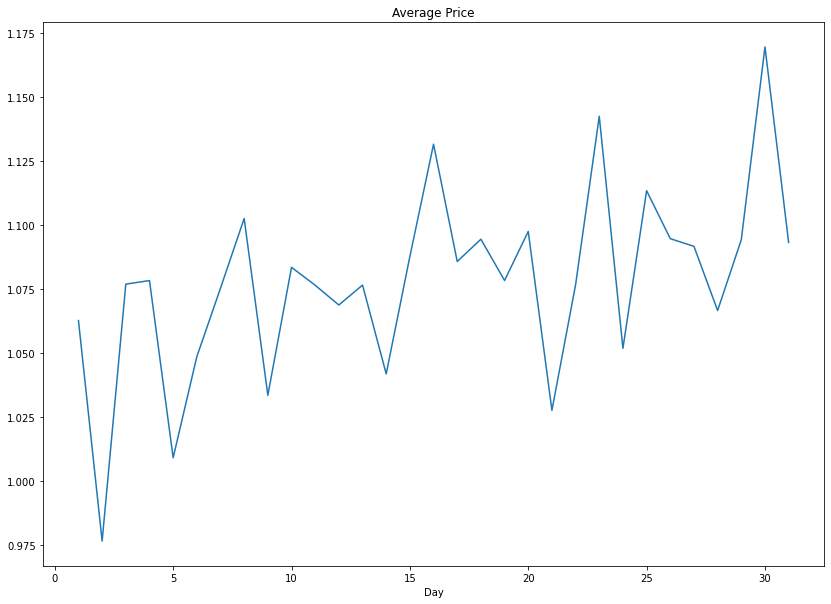

In [955]:
dt=df.groupby('Day').mean()
plt.figure(figsize=(14,10))
dt['AveragePrice'].plot()
plt.title('Average Price')

We can see here there is a gradual increase in the price with the daays passsing for each month.

Text(0.5, 1.0, 'Average Price')

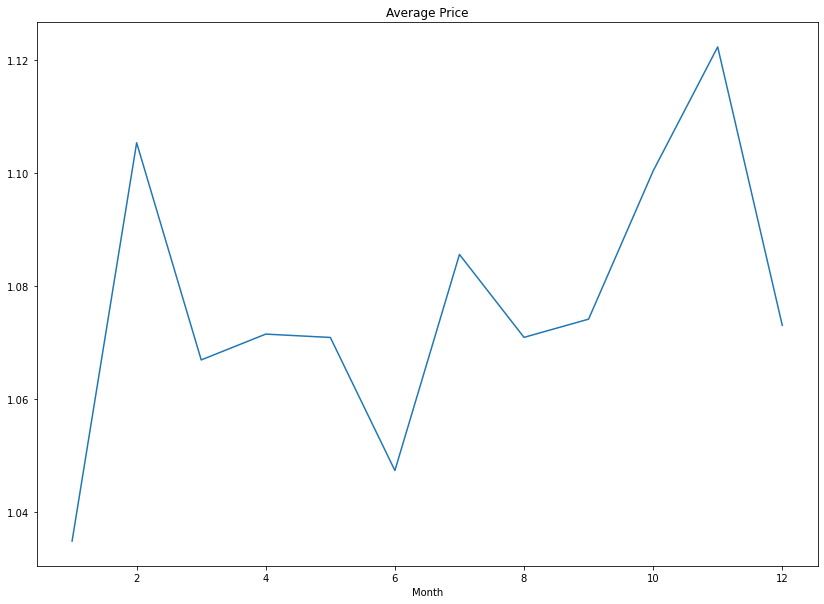

In [956]:
dt=df.groupby('Month').mean()
plt.figure(figsize=(14,10))
dt['AveragePrice'].plot()
plt.title('Average Price')

Withing the fisrt month, there is a decrease in data which comes below 1.06 coming towards the 6th month and thereafter picks up.

Text(0.5, 1.0, 'Average Price')

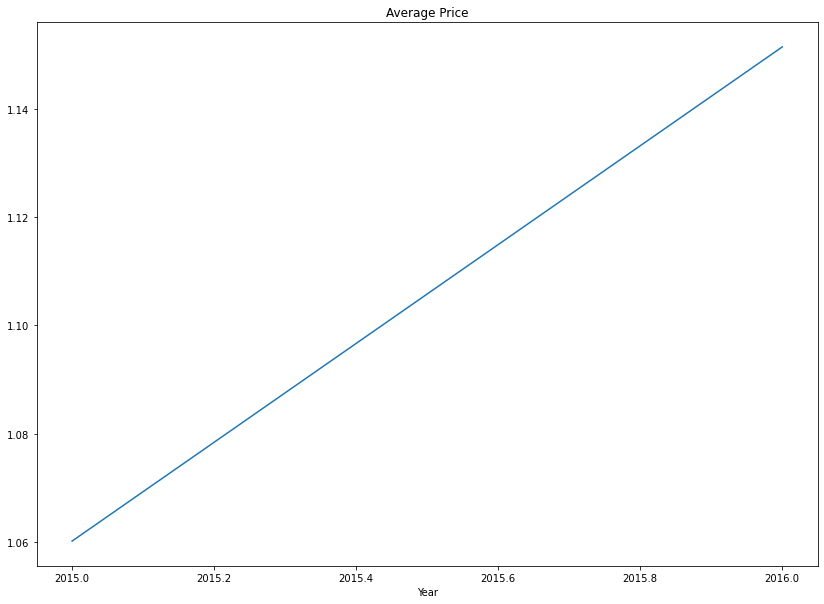

In [957]:
dt=df.groupby('Year').mean()
plt.figure(figsize=(14,10))
dt['AveragePrice'].plot()
plt.title('Average Price')

From 2015 to 2016, there is a steady inrease in the price of avacado.

Checking the distribution of data.

In [958]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'region', 'Year', 'Month',
       'Day'],
      dtype='object')

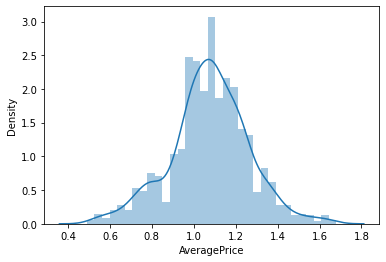

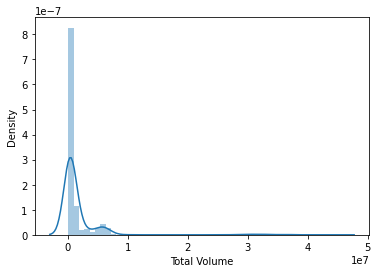

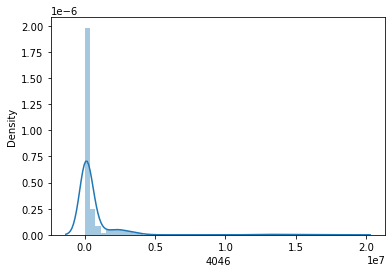

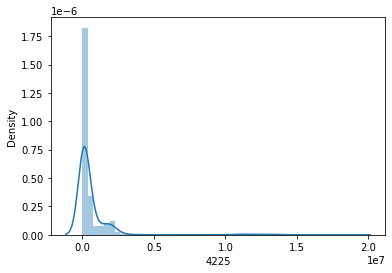

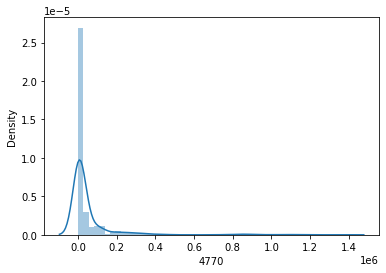

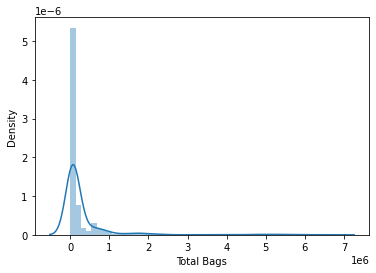

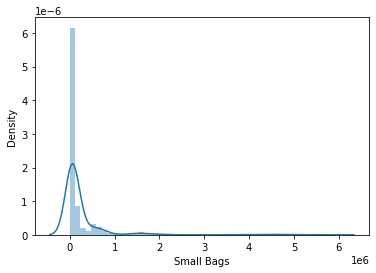

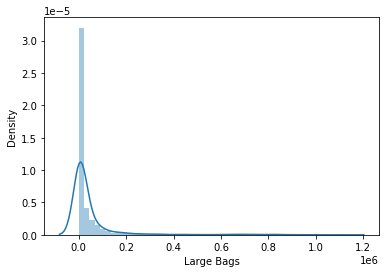

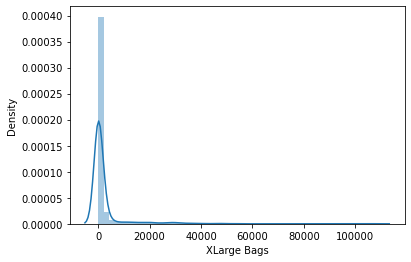

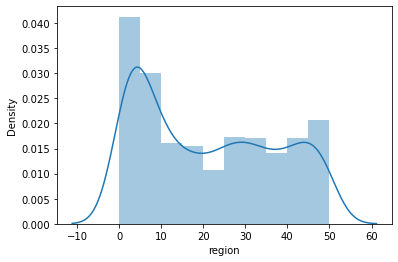

In [959]:
cols=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'region']
for i in cols:
    sns.distplot(df[i], kde = True)
    plt.show()

We are able to see here that the bag section is having a skewness in the data, reconfirming the same using skew command.

In [960]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
region          0.288146
Year            1.828332
Month           0.101439
Day             0.041303
dtype: float64

If we notice, there is a huge positive skewness in Total Volume, 4046 4225, 4770, Total bags, small bags, large bags and xlarge bags.

  ## Removing zscore and then skewness
        

In [961]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [962]:
dfn = df[(z<3).all(axis = 1)]
dfn.shape

(1436, 13)

In [963]:
df.shape

(1517, 13)

There are 81 ourliers so removed the outliers

Splitting data into x and y

In [964]:
x=dfn.drop(columns='AveragePrice')
y=dfn['AveragePrice']

In [965]:
x.shape

(1436, 12)

In [966]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,12,27
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,12,20
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,12,13
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,6,12
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,7,2016,10,16
1513,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,7,2016,9,10
1514,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,7,2016,2,10
1515,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,7,2016,9,25


In [967]:
x.columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'region', 'Year', 'Month', 'Day'],
      dtype='object')

In [968]:
y.shape

(1436,)

Removing Skewness

In [969]:
for i in x.columns:
    if x[i].skew()>0.5:
        x[i] = np.cbrt(x[i])
    if x[i].skew()<-0.5:
        x[i] = np.cbrt(x[i])
x.skew()

Total Volume    1.360283
4046            1.241668
4225            0.980401
4770            1.076970
Total Bags      1.569990
Small Bags      1.559423
Large Bags      0.933361
XLarge Bags     1.867443
region          0.276276
Year            2.004439
Month           0.111898
Day             0.041849
dtype: float64

We have bought down the skewness now working on standardising the data

In [970]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
0,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.000000,0,12.630630,12,27
1,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.000000,0,12.630630,12,20
2,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.000000,0,12.630630,12,13
3,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.000000,0,12.630630,6,12
4,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.000000,0,12.630630,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,57.574171,38.603725,38.341942,25.978177,39.021785,36.549075,21.796084,6.216881,7,12.632719,10,16
1513,56.277087,35.122258,37.370423,26.879006,39.853779,37.961212,20.485264,0.000000,7,12.632719,9,10
1514,56.295506,35.924934,37.537652,25.579488,39.667191,37.641271,20.212860,9.378887,7,12.632719,2,10
1515,57.401244,37.823463,37.702567,25.960205,39.985772,38.179545,20.229246,0.000000,7,12.632719,9,25


In [971]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [972]:
x=pd.DataFrame(x)

In [973]:
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.061388,-1.149136,-0.620765,-1.165526,-1.253098,-1.173614,-0.973673,-0.629534,-1.322817,-0.413870,1.637005,1.308085
1,-1.116298,-1.187979,-0.702076,-1.149832,-1.222094,-1.141157,-0.969220,-0.629534,-1.322817,-0.413870,1.637005,0.528523
2,-0.819293,-1.173796,-0.289925,-1.071729,-1.275361,-1.197484,-0.963482,-0.629534,-1.322817,-0.413870,1.637005,-0.251039
3,-0.984771,-1.140490,-0.497166,-1.130661,-1.382706,-1.312477,-0.935562,-0.629534,-1.322817,-0.413870,-0.096578,-0.362405
4,-1.140621,-1.158329,-0.709214,-1.126708,-1.363837,-1.295832,-0.888782,-0.629534,-1.322817,-0.413870,1.348074,1.530817
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.591541,-0.330854,-0.606092,0.295700,-0.328072,-0.332572,0.161610,0.403243,-0.879305,2.416215,1.059144,0.083059
1432,-0.626316,-0.430873,-0.638601,0.354622,-0.286375,-0.258612,0.075397,-0.629534,-0.879305,2.416215,0.770213,-0.585137
1433,-0.625822,-0.407813,-0.633005,0.269622,-0.295726,-0.275369,0.057481,0.928530,-0.879305,2.416215,-1.252300,-0.585137
1434,-0.596177,-0.353270,-0.627487,0.294524,-0.279760,-0.247177,0.058559,-0.629534,-0.879305,2.416215,0.770213,1.085353


In [974]:
x.columns=['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'region', 'Year', 'Month', 'Day']

In [975]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
0,-1.061388,-1.149136,-0.620765,-1.165526,-1.253098,-1.173614,-0.973673,-0.629534,-1.322817,-0.413870,1.637005,1.308085
1,-1.116298,-1.187979,-0.702076,-1.149832,-1.222094,-1.141157,-0.969220,-0.629534,-1.322817,-0.413870,1.637005,0.528523
2,-0.819293,-1.173796,-0.289925,-1.071729,-1.275361,-1.197484,-0.963482,-0.629534,-1.322817,-0.413870,1.637005,-0.251039
3,-0.984771,-1.140490,-0.497166,-1.130661,-1.382706,-1.312477,-0.935562,-0.629534,-1.322817,-0.413870,-0.096578,-0.362405
4,-1.140621,-1.158329,-0.709214,-1.126708,-1.363837,-1.295832,-0.888782,-0.629534,-1.322817,-0.413870,1.348074,1.530817
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.591541,-0.330854,-0.606092,0.295700,-0.328072,-0.332572,0.161610,0.403243,-0.879305,2.416215,1.059144,0.083059
1432,-0.626316,-0.430873,-0.638601,0.354622,-0.286375,-0.258612,0.075397,-0.629534,-0.879305,2.416215,0.770213,-0.585137
1433,-0.625822,-0.407813,-0.633005,0.269622,-0.295726,-0.275369,0.057481,0.928530,-0.879305,2.416215,-1.252300,-0.585137
1434,-0.596177,-0.353270,-0.627487,0.294524,-0.279760,-0.247177,0.058559,-0.629534,-0.879305,2.416215,0.770213,1.085353


Now as the data standardisation is done and every process is done, we can move ahead with modelling the data.

## Modelling

In [976]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=.30,random_state=25)

Not using for loop for test and random state as we usually work on getting the best random state and use that for other models as well, however there is a possibility the the random value chanage with the model we use to get the best random state or test size hence not using that and assuming mostly used 30 7- split for test and a random value for random state as I presume that it might not bring a big difference in the data.

In [977]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [978]:
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

In [979]:
model=[lr,knr,dtr,svr,rfr,ls,rd,eln]
for m in model:
    print('The model is: ',m)
    m.fit(x_train,y_train)
    predict=m.predict(x_test)
    pred_train=m.predict(x_train)
    print('R2_score for the training : ',r2_score(y_train,pred_train))
    print('R2 score for the model is: ',r2_score(y_test,predict))
    print('Mean absolute error is: ',mean_absolute_error(y_test,predict))
    print('Mean squared error is: ',mean_squared_error(y_test,predict))
    print('\n\n')

The model is:  LinearRegression()
R2_score for the training :  0.4003875663864672
R2 score for the model is:  0.3859284341636381
Mean absolute error is:  0.11675838408762014
Mean squared error is:  0.0219092157040105



The model is:  KNeighborsRegressor()
R2_score for the training :  0.807774431638044
R2 score for the model is:  0.714430414927185
Mean absolute error is:  0.07904872389791182
Mean squared error is:  0.010188723897911835



The model is:  DecisionTreeRegressor()
R2_score for the training :  1.0
R2 score for the model is:  0.6167186832582618
Mean absolute error is:  0.0793735498839907
Mean squared error is:  0.01367494199535963



The model is:  SVR()
R2_score for the training :  0.8003555956744884
R2 score for the model is:  0.7095905637800528
Mean absolute error is:  0.08066164687857211
Mean squared error is:  0.010361403026302023



The model is:  RandomForestRegressor()
R2_score for the training :  0.9713315807453136
R2 score for the model is:  0.7996504408351441
Mean

In [980]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model:
    print('The model is: \n',m)
    for j in range (2,10):
        train_accuracy = r2_score(y_train, pred_train)
        test_accuracy = r2_score(y_test, predict)
        cv_score = cross_val_score(m, x, y, cv = j)
        cv_mean = cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print('\n\n')
    

The model is: 
 LinearRegression()
At cross fold 2 the cv score is -0.333509449522702



At cross fold 3 the cv score is 0.05720809898180065



At cross fold 4 the cv score is -0.041453335345209785



At cross fold 5 the cv score is -0.18654508276154297



At cross fold 6 the cv score is -0.24165360249713497



At cross fold 7 the cv score is -0.49477720586262336



At cross fold 8 the cv score is 0.013838741015737718



At cross fold 9 the cv score is 0.09441920923916267



The model is: 
 KNeighborsRegressor()
At cross fold 2 the cv score is -0.05818849485079586



At cross fold 3 the cv score is 0.1972476808857522



At cross fold 4 the cv score is 0.024700478643066626



At cross fold 5 the cv score is 0.04038343116830123



At cross fold 6 the cv score is -0.003199417520514188



At cross fold 7 the cv score is -0.1446869822404866



At cross fold 8 the cv score is -0.1173435697038214



At cross fold 9 the cv score is 0.11004088699719818



The model is: 
 DecisionTreeRegressor()

KeyboardInterrupt: 

Looking at the above model SVR is having the best model at cv 2. that is ## 67.4%

In [981]:
svr.fit(x_train, y_train)
a = svr.score(x_train, y_train)
pred_train = svr.predict(x_train)
pred_test_ls = svr.predict(x_test)


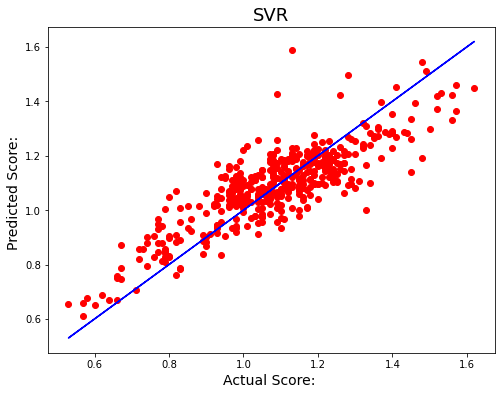

In [983]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_test_svr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual Score: ', fontsize = 14)
plt.ylabel('Predicted Score: ', fontsize = 14)
plt.title('SVR', fontsize = 18)
plt.show()

We see here almost all the daata are lying towards the predicted line.

## Grid Search CV


In [984]:
from sklearn.model_selection import GridSearchCV
param = {'kernel' : ('linear', 'poly', 'rbf'),'C' : [1,5,10],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},

modelsvr = SVR()

grids = GridSearchCV(modelsvr,param,cv=2)


grid_result = grids.fit(x_train, y_train)


print(grids.best_params_)

print('Best Score: ', grid_result.best_score_)

{'C': 1, 'coef0': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score:  0.6331442262436718


In [989]:
svr=SVR(kernel='rbf',C=1 ,coef0= 0.01, gamma='scale' )

In [990]:
svr.fit(x_train, y_train)
svr.score(x_train, y_train)
predsvr = svr.predict(x_test)
data = [predsvr, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,421,422,423,424,425,426,427,428,429,430
Predicted,0.954317,1.171722,0.945853,1.147566,1.11239,0.762553,1.31077,0.977038,1.099007,1.205804,...,1.275197,1.0991,1.16353,0.901379,1.116056,1.187177,1.06961,1.140187,1.07711,1.073856
Actual,1.040000,1.270000,0.930000,1.240000,1.24000,0.820000,1.33000,1.030000,1.340000,1.280000,...,1.190000,1.1100,0.96000,0.900000,0.990000,1.100000,1.10000,1.100000,0.98000,1.120000


In [991]:
print('Errors:')
print('\n')
print('Mean absolute error: ', mean_absolute_error(y_test,predsvr))
print('Mean squared error: ', mean_squared_error(y_test,predsvr))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,predsvr)))
print('\n')
print('R2 Score: ', r2_score(y_test,predsvr))

Errors:


Mean absolute error:  0.08066164687857211
Mean squared error:  0.010361403026302023
Root mean squared error:  0.10179097713600171


R2 Score:  0.7095905637800528


Its a pretty good R2 score that is 70.95%

## Saving the model

In [993]:
joblib.dump(svr, 'avacadosvr.obj')


['avacadosvr.obj']